# Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression


# Datasets Filtering and Preparing

## Reading Dataset

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,speaking score,reading score,writing score,listening score
0,female,group B,bachelor's degree,standard,none,72,72,74,86
1,female,group C,some college,standard,completed,69,90,88,77
2,female,group B,master's degree,standard,none,90,95,93,65
3,male,group A,associate's degree,free/reduced,none,47,57,44,55
4,male,group C,some college,standard,none,76,78,75,95
5,female,group B,associate's degree,standard,none,71,83,78,62
6,female,group B,some college,standard,completed,88,95,92,74
7,male,group B,some college,free/reduced,none,40,43,39,76
8,male,group D,high school,free/reduced,completed,64,64,67,78
9,female,group B,high school,free/reduced,none,38,60,50,75


## Set out Categorical Columns in the Dataset

In [3]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

## Unique values in Categorical Columns

In [4]:
for i in categorical_cols:
    print(df[i].unique())


['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


## Data Cleaning

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
speaking score                 0
reading score                  0
writing score                  0
listening score                0
dtype: int64

## Calculate Average Score

In [6]:
df['average_score'] = (df['listening score'] + df['reading score'] + df['writing score'] + df['speaking score']) /4

In [7]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,speaking score,reading score,writing score,listening score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,86,76.00
1,female,group C,some college,standard,completed,69,90,88,77,81.00
2,female,group B,master's degree,standard,none,90,95,93,65,85.75
3,male,group A,associate's degree,free/reduced,none,47,57,44,55,50.75
4,male,group C,some college,standard,none,76,78,75,95,81.00
5,female,group B,associate's degree,standard,none,71,83,78,62,73.50
6,female,group B,some college,standard,completed,88,95,92,74,87.25
7,male,group B,some college,free/reduced,none,40,43,39,76,49.50
8,male,group D,high school,free/reduced,completed,64,64,67,78,68.25
9,female,group B,high school,free/reduced,none,38,60,50,75,55.75


# Data Analysist

## Distribution of Score

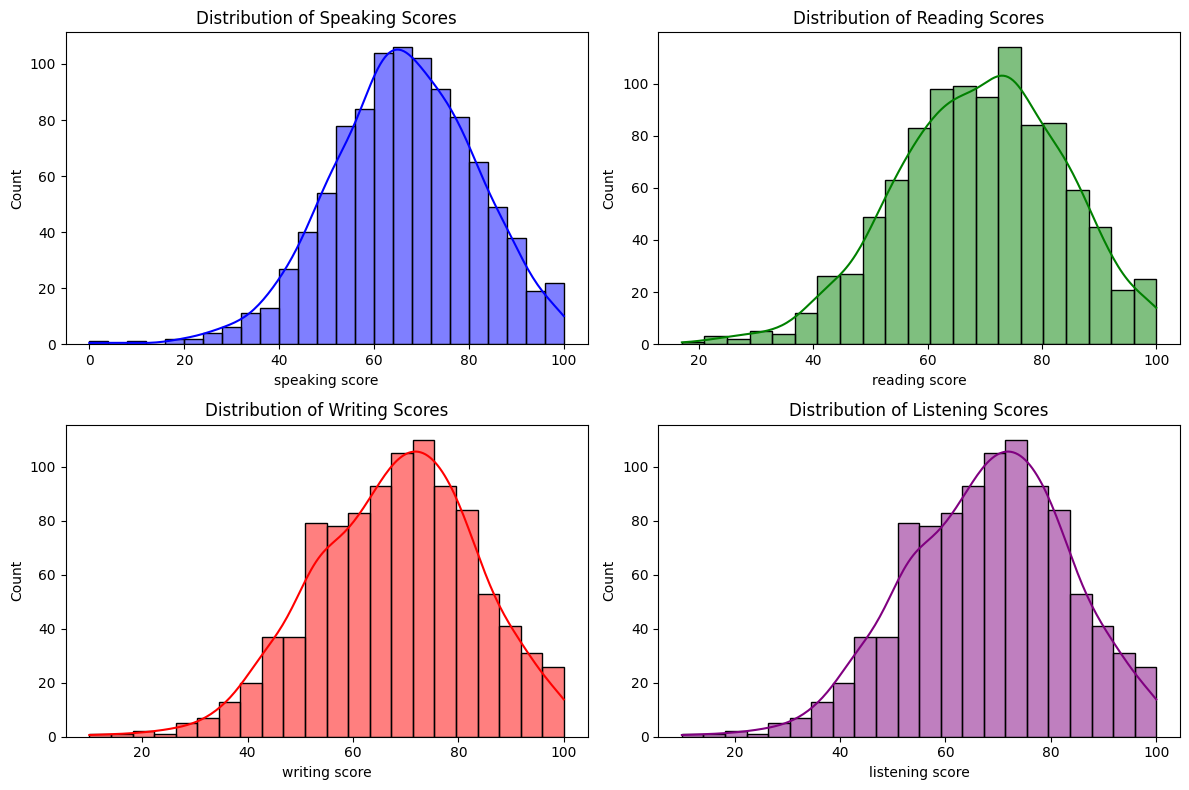

In [8]:
 # Visualizing distributions of scores
plt.figure(figsize=(12, 8))

# Speaking score distribution
plt.subplot(2, 2, 1)
sns.histplot(df['speaking score'], kde=True, color='blue')
plt.title('Distribution of Speaking Scores')

# Reading score distribution
plt.subplot(2, 2, 2)
sns.histplot(df['reading score'], kde=True, color='green')
plt.title('Distribution of Reading Scores')

# Writing score distribution
plt.subplot(2, 2, 3)
sns.histplot(df['writing score'], kde=True, color='red')
plt.title('Distribution of Writing Scores')

# Listening score distribution
plt.subplot(2, 2, 4)
sns.histplot(df['listening score'], kde=True, color='purple')
plt.title('Distribution of Listening Scores')

plt.tight_layout()
plt.show()


## Average Score Distribution

### Average Score Distribution According to Gender

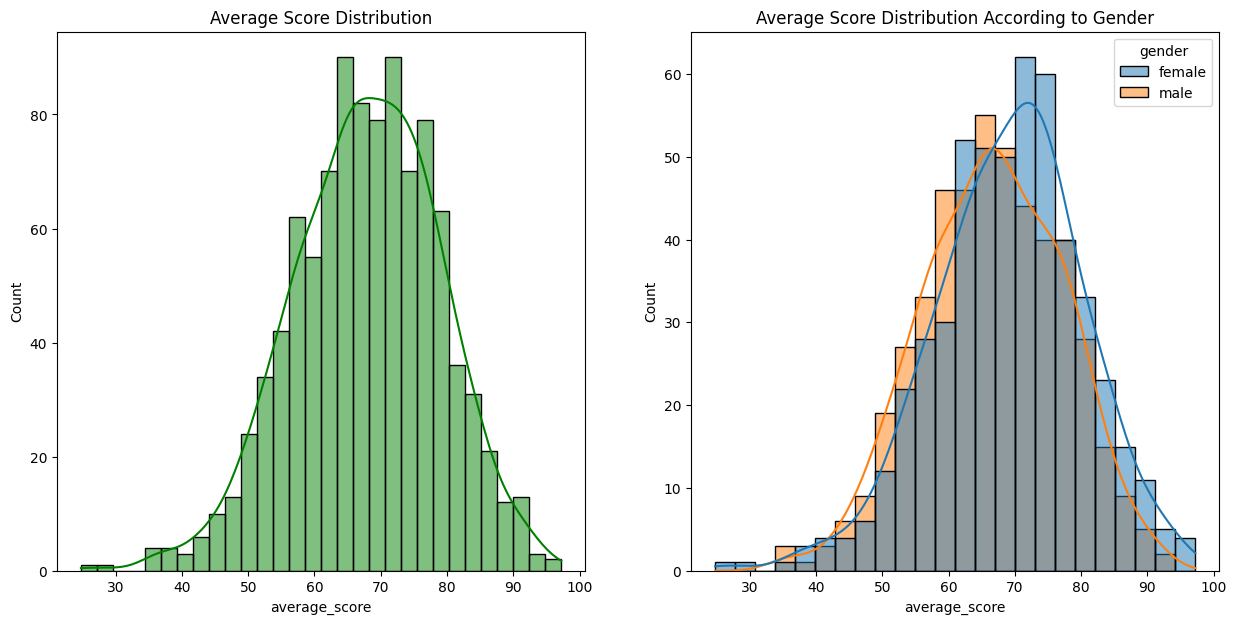

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g',)
plt.title('Average Score Distribution')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.title('Average Score Distribution According to Gender')
plt.show()

### Average Score Distribution According to Lunch

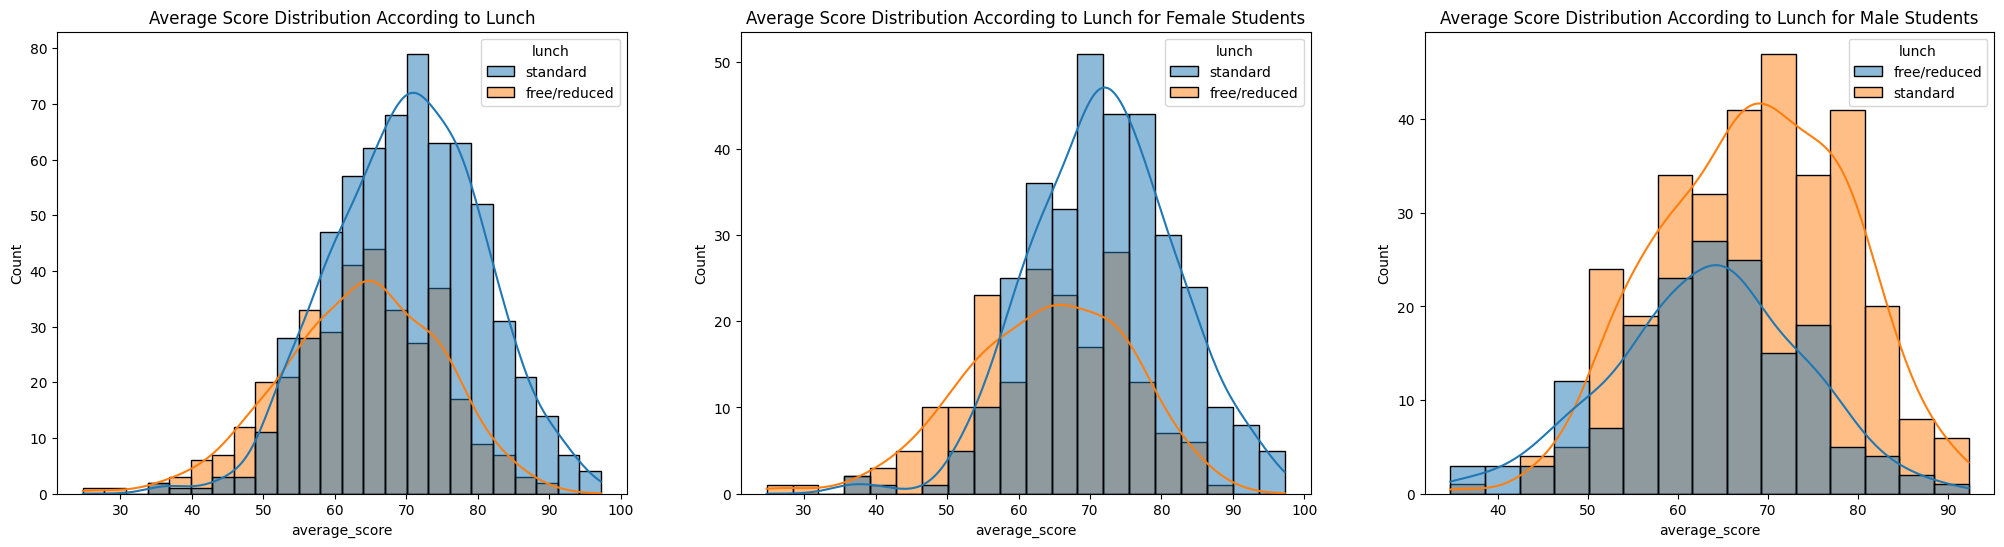

In [10]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.title('Average Score Distribution According to Lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.title('Average Score Distribution According to Lunch for Female Students')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.title('Average Score Distribution According to Lunch for Male Students')
plt.show()

### Average Score Distribution According to Parent level of education

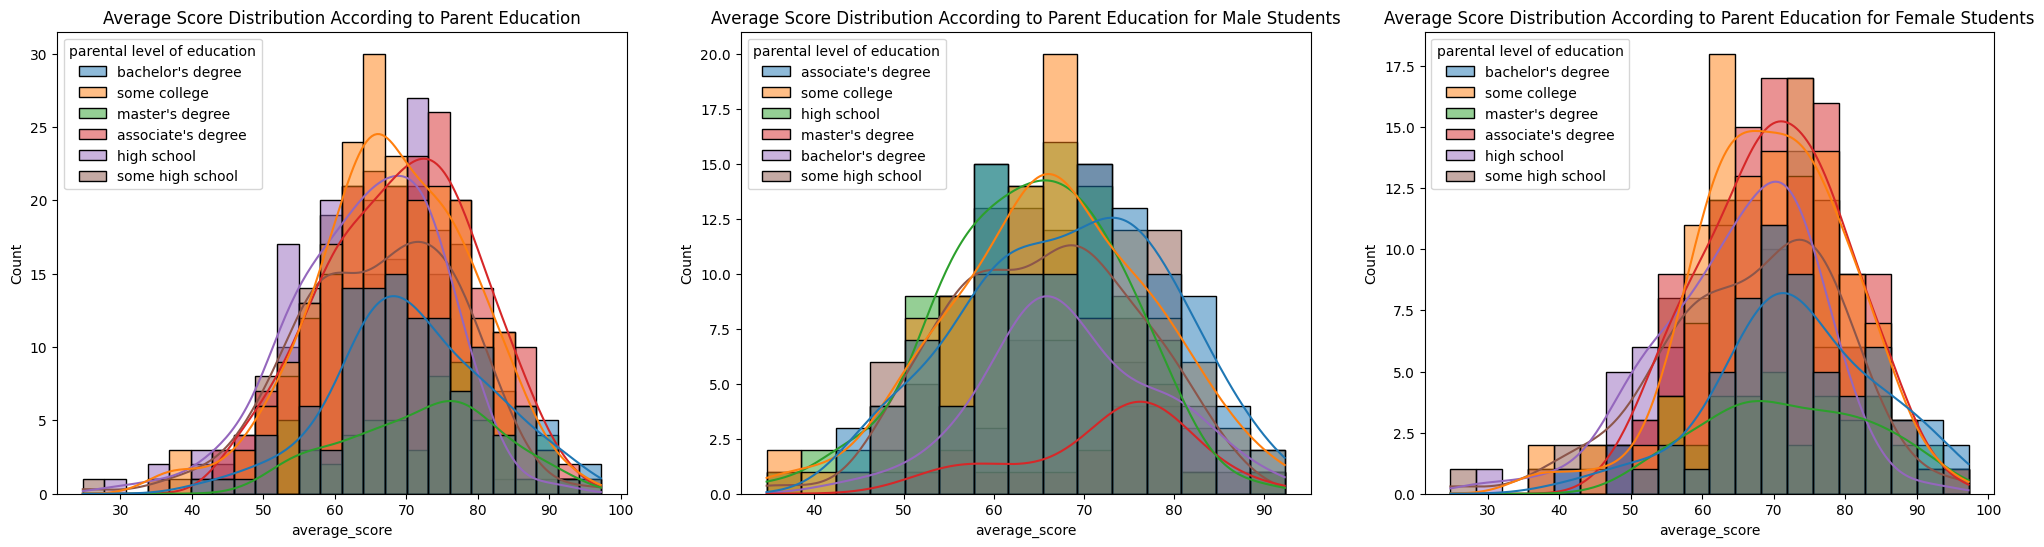

In [11]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='parental level of education')
plt.title('Average Score Distribution According to Parent Education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental level of education')
plt.title('Average Score Distribution According to Parent Education for Male Students')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental level of education')
plt.title('Average Score Distribution According to Parent Education for Female Students')
plt.show()

### Average Score Distribution According to Race

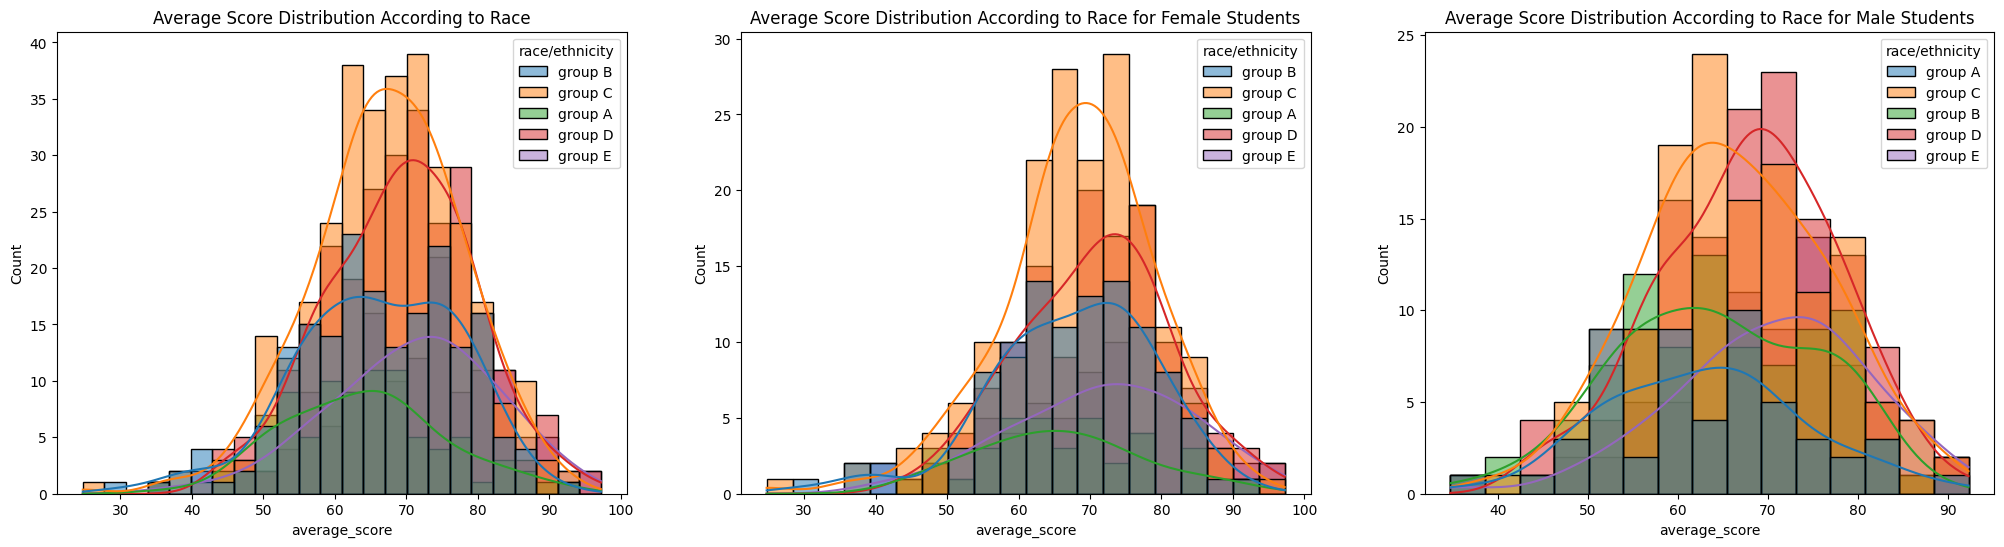

In [12]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='race/ethnicity')
plt.title('Average Score Distribution According to Race')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race/ethnicity')
plt.title('Average Score Distribution According to Race for Female Students')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race/ethnicity')
plt.title('Average Score Distribution According to Race for Male Students')
plt.show()

### Average Score Distribution According to Preparation for Test

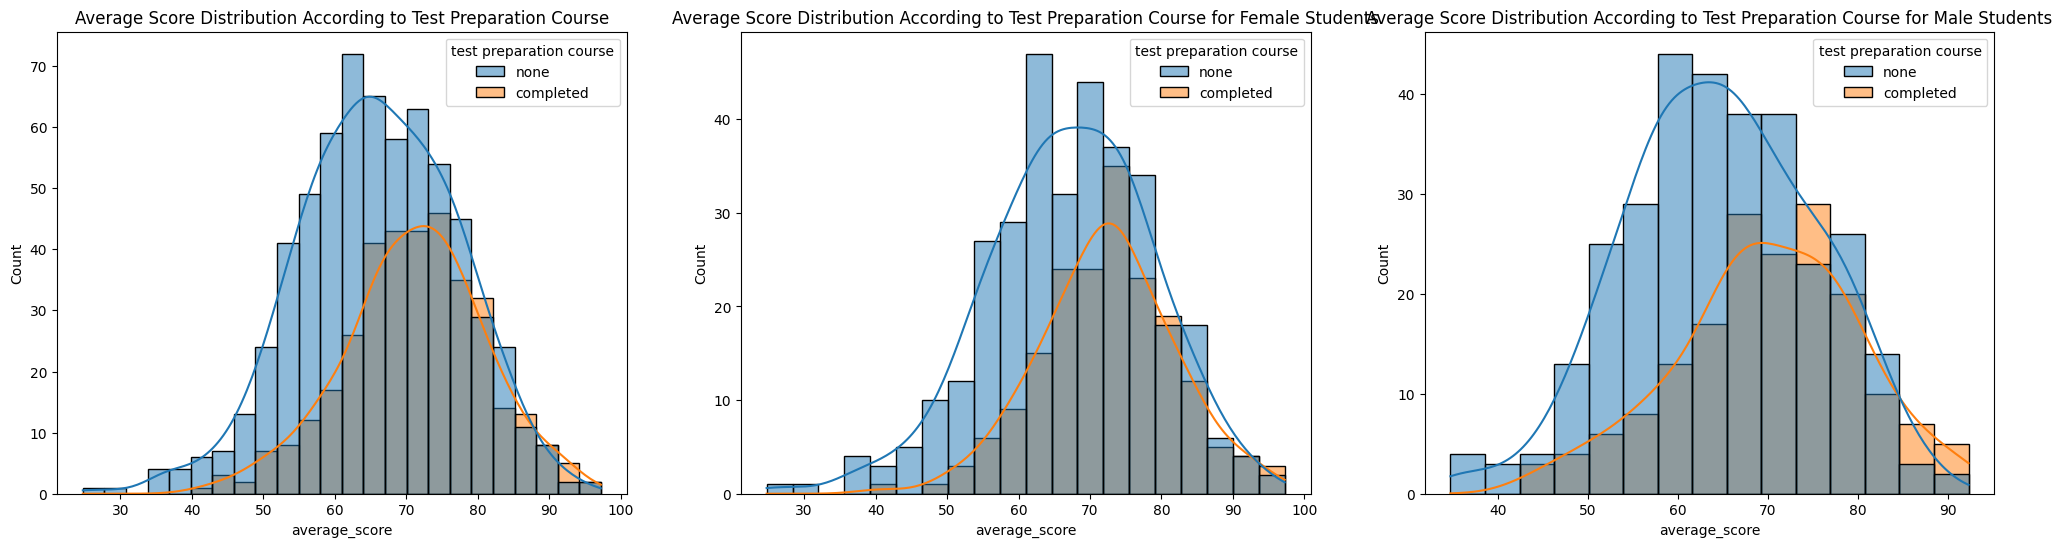

In [13]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='test preparation course')
plt.title('Average Score Distribution According to Test Preparation Course')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='test preparation course')
plt.title('Average Score Distribution According to Test Preparation Course for Female Students')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='test preparation course')
plt.title('Average Score Distribution According to Test Preparation Course for Male Students')
plt.show()

## Correlation Matrix Heatmap

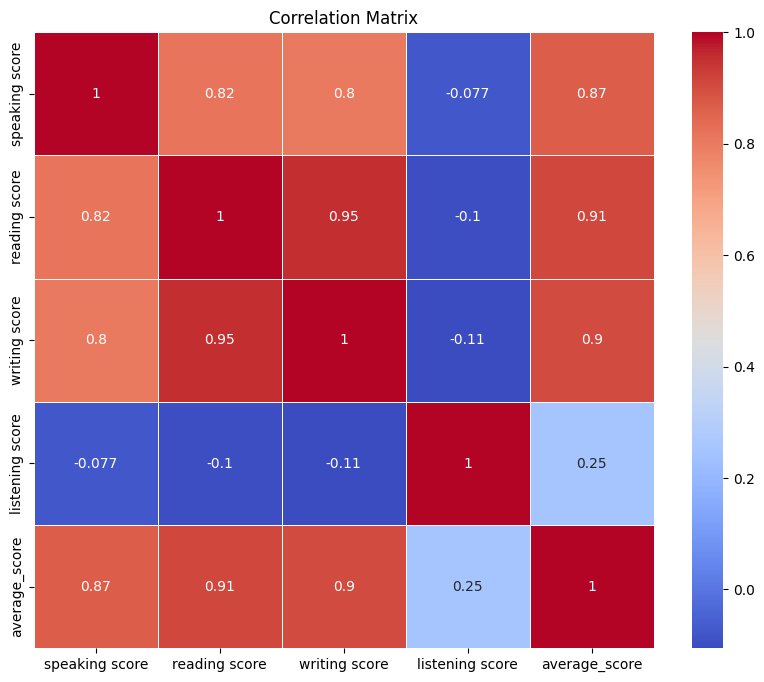

In [14]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Count Plots for Categorical Values

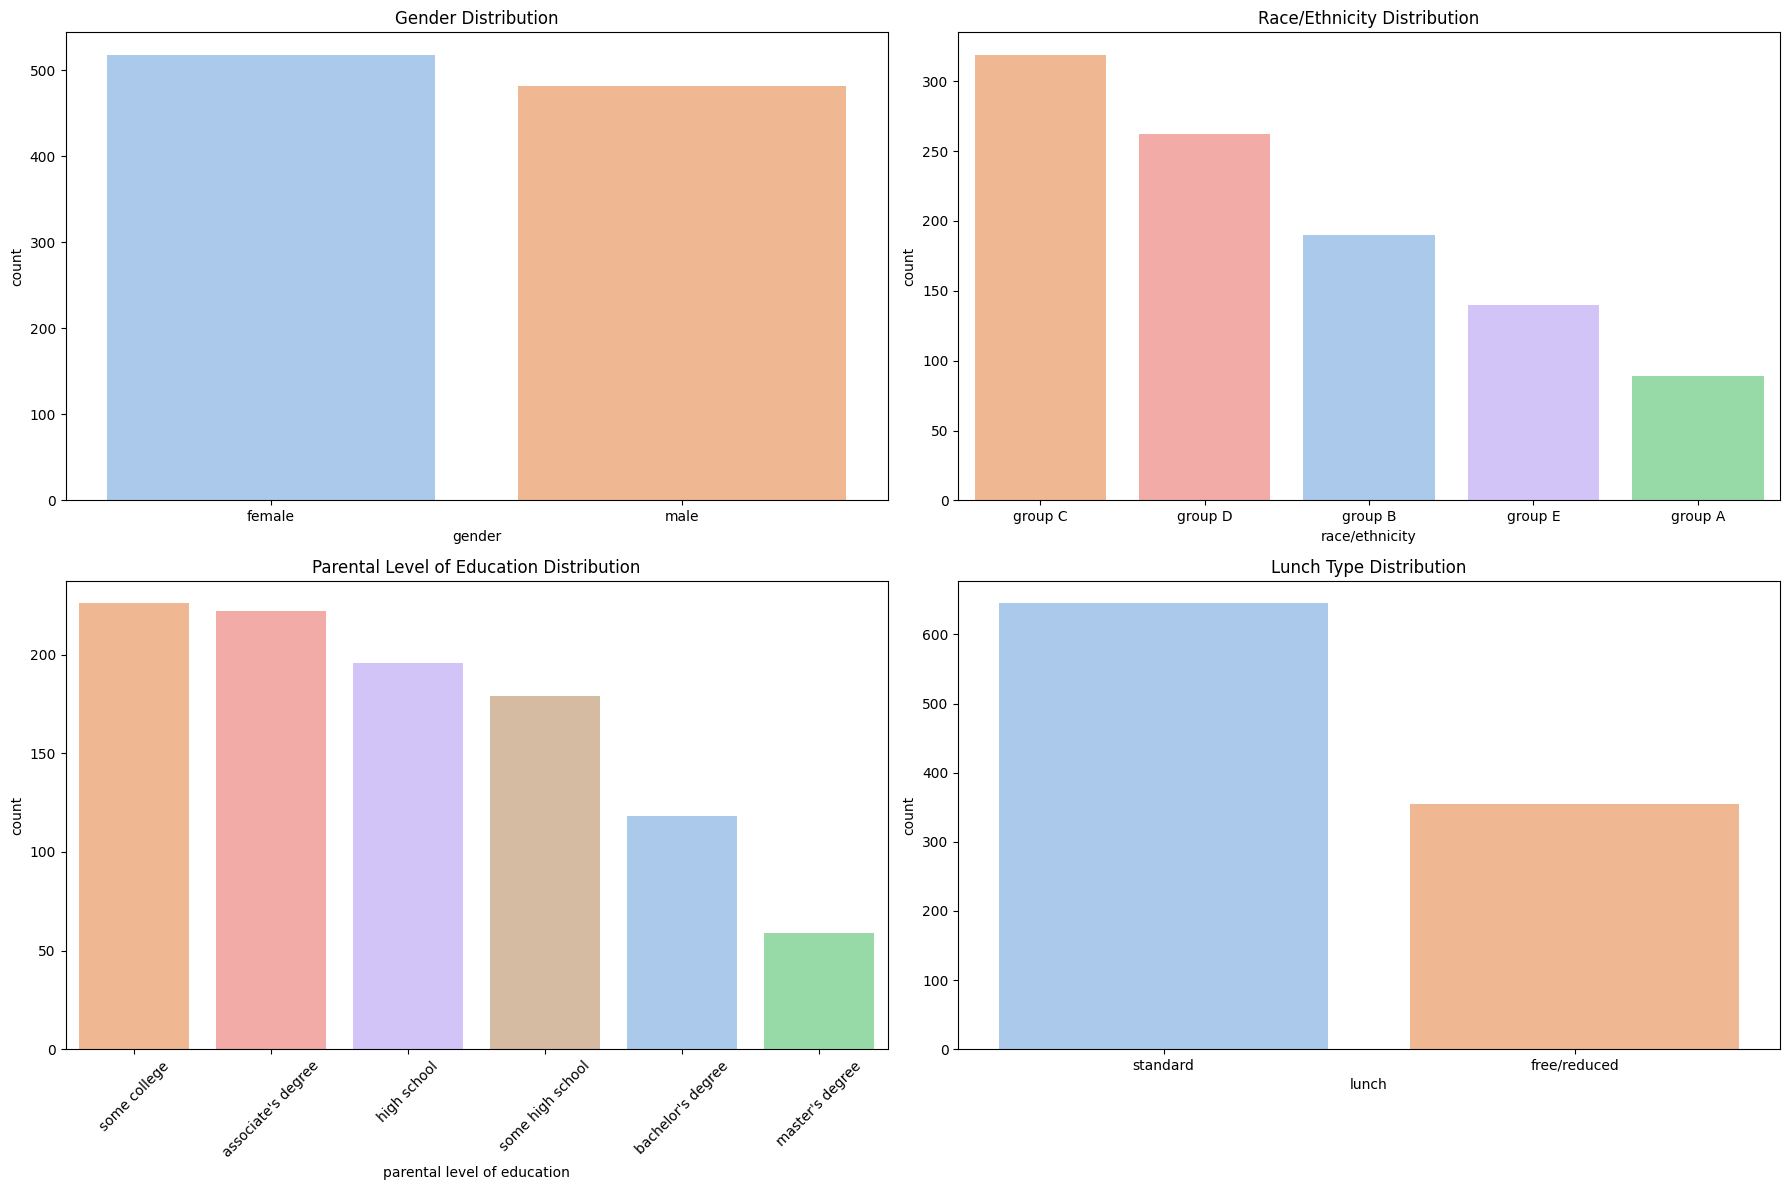

In [15]:
# Count plots for categorical variables
plt.figure(figsize=(18, 12))

# Gender count plot
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='gender', hue='gender', palette='pastel', dodge=False)
plt.title('Gender Distribution')
plt.legend([],[], frameon=False)  # Hide legend

# Race/ethnicity count plot
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='race/ethnicity', hue='race/ethnicity', palette='pastel', order=df['race/ethnicity'].value_counts().index, dodge=False)
plt.title('Race/Ethnicity Distribution')
plt.legend([],[], frameon=False)  # Hide legend

# Parental level of education count plot
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='parental level of education', hue='parental level of education', palette='pastel', order=df['parental level of education'].value_counts().index, dodge=False)
plt.title('Parental Level of Education Distribution')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)  # Hide legend

# Lunch count plot
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='lunch', hue='lunch', palette='pastel', dodge=False)
plt.title('Lunch Type Distribution')
plt.legend([],[], frameon=False)  # Hide legend

plt.tight_layout()
plt.show()

# Encoding Data

In [16]:
gender = {
    'male': 1,
    'female': 0
}

race = {
    'group A': 0,
    'group B': 1,
    'group C': 2,
    'group D': 3,
    'group E': 4
}

level = {
    "bachelor's degree": 0,
    'some college': 1,
    "master's degree":2,
    "associate's degree": 3,
    "high school": 4,
    "some high school": 5
}

df['gender'] = df['gender'].map(gender)
df['race/ethnicity'] = df['race/ethnicity'].map(race)
df['parental level of education'] = df['parental level of education'].map(level)
df = pd.get_dummies(df, drop_first=True)

df

,gender,race/ethnicity,parental level of education,speaking score,reading score,writing score,listening score,average_score,lunch_standard,test preparation course_none
0,0,1,0,72,72,74,86,76.00,True,True
1,0,2,1,69,90,88,77,81.00,True,False
2,0,1,2,90,95,93,65,85.75,True,True
3,1,0,3,47,57,44,55,50.75,False,True
4,1,2,1,76,78,75,95,81.00,True,True
...,...,...,...,...,...,...,...,...,...,...
995,0,4,2,88,99,95,75,89.25,True,False
996,1,2,4,62,55,55,44,54.00,False,True
997,0,2,4,59,71,65,93,72.00,False,False
998,0,3,1,68,78,77,88,77.75,True,False


## Initialize Output and Multiple Inputs

### Initialize Inputs

In [17]:
# Initialize Input with Writing score
inp1 = df.drop(columns=["average_score", "listening score", "speaking score", "reading score"]).values
inp1

array([[0, 1, 0, 74, True, True],
       [0, 2, 1, 88, True, False],
       [0, 1, 2, 93, True, True],
       ...,
       [0, 2, 4, 65, False, False],
       [0, 3, 1, 77, True, False],
       [0, 3, 1, 86, False, True]], dtype=object)

In [18]:
# Initialize Input with Listening score
inp2 = df.drop(columns=["average_score", "speaking score", "reading score", "writing score"]).values
inp2

array([[0, 1, 0, 86, True, True],
       [0, 2, 1, 77, True, False],
       [0, 1, 2, 65, True, True],
       ...,
       [0, 2, 4, 93, False, False],
       [0, 3, 1, 88, True, False],
       [0, 3, 1, 74, False, True]], dtype=object)

In [19]:
# Initialize Input with Reading score
inp3 = df.drop(columns=["average_score", "speaking score", "listening score", "writing score"]).values
inp3

array([[0, 1, 0, 72, True, True],
       [0, 2, 1, 90, True, False],
       [0, 1, 2, 95, True, True],
       ...,
       [0, 2, 4, 71, False, False],
       [0, 3, 1, 78, True, False],
       [0, 3, 1, 86, False, True]], dtype=object)

In [20]:
# Initialize Input with Speaking score
inp4 = df.drop(columns=["average_score", "listening score", "reading score", "writing score"]).values
inp4

array([[0, 1, 0, 72, True, True],
       [0, 2, 1, 69, True, False],
       [0, 1, 2, 90, True, True],
       ...,
       [0, 2, 4, 59, False, False],
       [0, 3, 1, 68, True, False],
       [0, 3, 1, 77, False, True]], dtype=object)

### Initialize Output

In [21]:
out = df['average_score'].values
out

array([76.  , 81.  , 85.75, 50.75, 81.  , 73.5 , 87.25, 49.5 , 68.25,
       55.75, 61.75, 45.  , 73.75, 67.75, 53.75, 76.  , 88.5 , 41.  ,
       53.  , 49.  , 73.  , 64.5 , 52.25, 68.75, 75.5 , 71.5 , 59.75,
       67.75, 68.5 , 76.75, 74.25, 64.  , 63.25, 46.  , 84.5 , 74.75,
       78.25, 68.25, 76.5 , 58.5 , 60.25, 64.5 , 69.  , 67.75, 55.5 ,
       61.25, 59.  , 71.25, 72.5 , 79.75, 57.25, 66.5 , 49.75, 80.25,
       75.  , 44.5 , 78.5 , 55.  , 67.75, 24.75, 73.5 , 49.25, 58.75,
       68.25, 58.5 , 70.5 , 48.25, 69.75, 59.25, 57.5 , 61.25, 56.25,
       52.75, 56.5 , 49.75, 48.  , 35.75, 76.25, 63.25, 66.25, 59.25,
       54.75, 50.75, 74.75, 45.25, 72.5 , 78.25, 70.5 , 69.25, 72.25,
       70.25, 42.25, 78.  , 47.25, 83.5 , 81.25, 73.25, 61.5 , 65.25,
       70.75, 73.75, 69.75, 86.  , 44.5 , 78.  , 66.5 , 90.5 , 66.5 ,
       70.75, 74.25, 78.  , 60.  , 53.25, 64.5 , 94.75, 72.25, 71.5 ,
       77.5 , 61.25, 63.75, 83.5 , 88.  , 82.  , 65.  , 75.5 , 82.25,
       72.25, 73.5 ,

# Build Test Model

## Linear Regression

### Function for building, training, evaluating model  

In [27]:
# Function to train and evaluate the model
results = {}
def train_and_evaluate(inputs, output, test_size=0.2, random_state=42):
    for i, inp in enumerate(inputs):
        # Split the data
        inp_train, inp_test, out_train, out_test = train_test_split(inp, output, test_size=test_size, random_state=random_state)
        
        # Train the model
        model = LinearRegression()
        model.fit(inp_train, out_train)
        
        # Make predictions
        out_pred = model.predict(inp_test)
        
        # Evaluate the model
        mae = mean_absolute_error(out_test, out_pred)
        mse = mean_squared_error(out_test, out_pred)
        r2 = r2_score(out_test, out_pred)
        
        # Store the results
        results[f'Input {i+1}'] = {
            'mae': mae,
            'mse': mse,
            'r2': r2,
            'actual': out_test,
            'predicted': out_pred,
            'residuals': out_test - out_pred
        }
        
        # Create a DataFrame to display the results
        metrics = pd.DataFrame({
        'Metric': ['Mean Absolute Error', 'Mean Squared Error', 'R^2 Score'],
        'Value': [mae, mse, r2]
        })
        print(f"Results for Input {i+1}:")
        print(metrics)
        print("\n")
        
    return results
        

In [28]:
inputs = [inp1, inp2, inp3, inp4]
output = out

results = train_and_evaluate(inputs, output)

Results for Input 1:
                Metric      Value
0  Mean Absolute Error   3.388518
1   Mean Squared Error  17.120091
2            R^2 Score   0.866026


Results for Input 2:
                Metric       Value
0  Mean Absolute Error    7.901327
1   Mean Squared Error  101.369830
2            R^2 Score    0.206728


Results for Input 3:
                Metric      Value
0  Mean Absolute Error   3.170402
1   Mean Squared Error  17.124056
2            R^2 Score   0.865995


Results for Input 4:
                Metric      Value
0  Mean Absolute Error   3.583248
1   Mean Squared Error  18.300735
2            R^2 Score   0.856787




### Comparing Actual vs Prediction

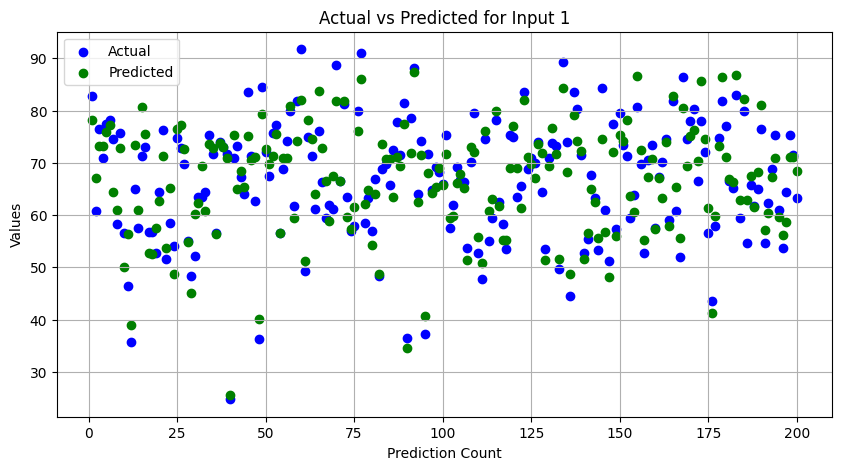

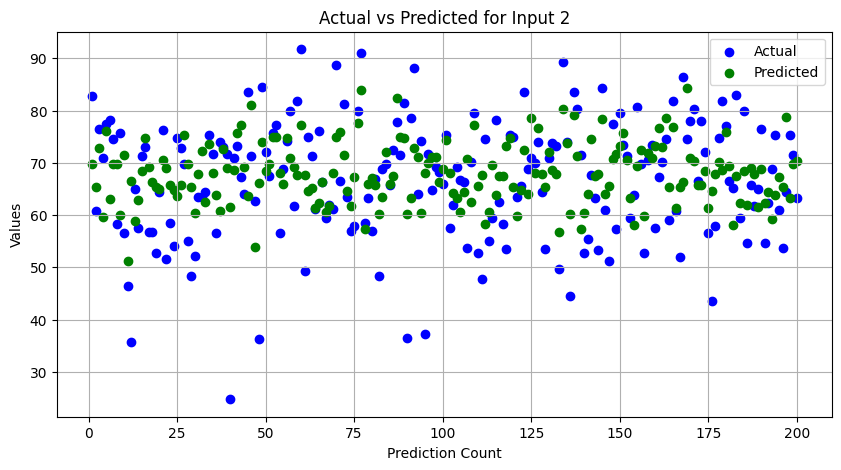

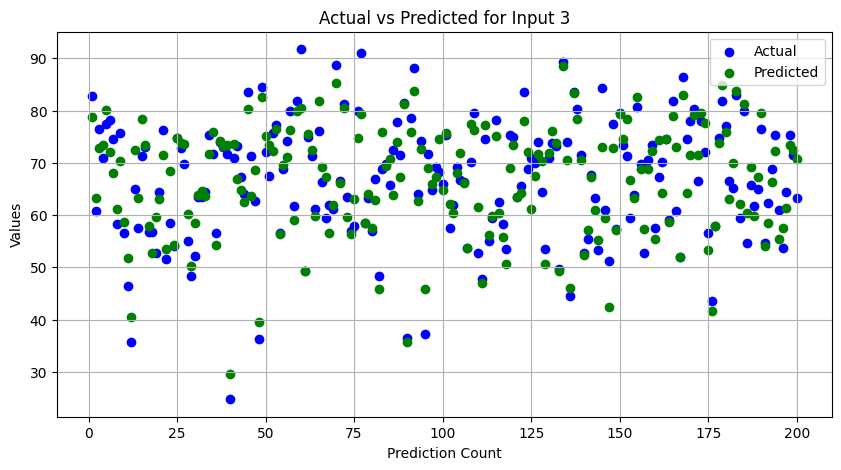

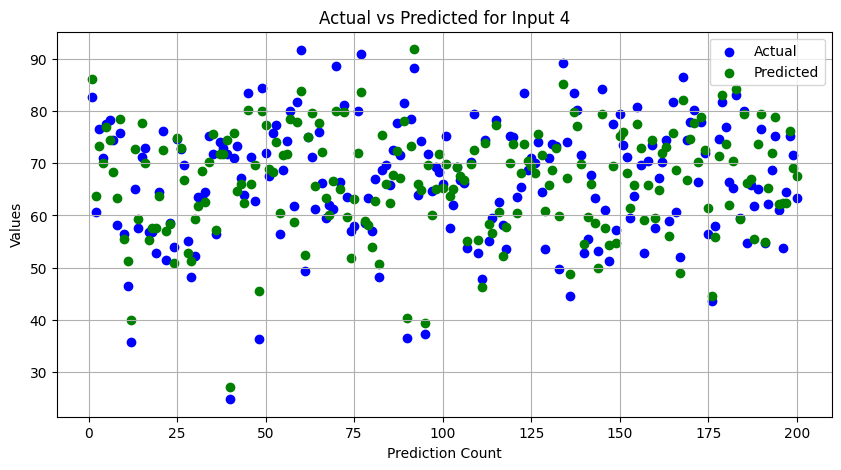

In [24]:
# Function to plot comparison of actual vs predicted values
def plot_actual_vs_predicted(results):
    for key, value in results.items():
        actual = value['actual'].flatten()  # Flatten to convert to a 1D array
        predicted = value['predicted'].flatten()
        predictions_count = range(1, len(actual) + 1)

        # Plot actual vs predicted values
        plt.figure(figsize=(10, 5))
        plt.scatter(predictions_count, actual, label='Actual', color='blue')
        plt.scatter(predictions_count, predicted, label='Predicted', color='green')
        plt.plot([min(predictions_count), max(predictions_count)], [min(actual), max(actual)], color='red', linewidth=2, label='Ideal Fit')
        plt.xlabel('Prediction Count')
        plt.ylabel('Values')
        plt.title(f'Actual vs Predicted for {key}')
        plt.legend()
        plt.grid(True)
        plt.show()
        
plot_actual_vs_predicted(results)

### Plotting Residuals of the Model

In [ ]:
# Function to plot comparison of actual vs predicted values
def plotting_residuals(results):
    for key, value in results.items():
        predicted = value['predicted'].flatten()
        residuals = value['residuals'].flatten()
        #predictions_count = range(1, len(residuals) + 1)
        
        plt.figure(figsize=(10, 5))
        # plt.scatter(predictions_count, residuals, label='Residual', color='pink', edgecolors='k', marker='o')
        # plt.scatter(predictions_count, predicted, label='Predicted', color='purple', edgecolors='k', marker='o')
        plt.scatter(predicted, residuals, label='Residuals', color='pink', edgecolors='k', marker='o')
        plt.axhline(y=0, color='red', linestyle='--')
        plt.xlabel('Predicted Values')
        plt.ylabel('Residuals')
        plt.title(f'Residuals Plot for {key}')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        
plotting_residuals(results)